<a href="https://colab.research.google.com/github/ayushipradhan30/DMDW-Lab-Assignment/blob/main/DMDW_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#fetching and reading the contents of data
df=pd.read_csv(r"https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/maintenance_data.csv")
df

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,183.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,178.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


In [3]:
df.dropna(axis=0,inplace=True)

In [4]:
df.shape

(993, 7)

In [5]:
df.tail()

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4
999,63,0,116.901354,99.998694,47.641493,TeamB,Provider1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 993 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lifetime        993 non-null    int64  
 1   broken          993 non-null    int64  
 2   pressureInd     993 non-null    float64
 3   moistureInd     993 non-null    float64
 4   temperatureInd  993 non-null    float64
 5   team            993 non-null    object 
 6   provider        993 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 62.1+ KB


In [7]:
df.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,993.000000,993.000000,993.000000,993.000000,993.000000
mean,55.131923,0.394763,98.715052,110.960159,100.595028
std,26.459946,0.489046,19.876328,41.844343,19.615489
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.578027,94.535666,87.678519
50%,60.000000,0.000000,97.321050,102.839895,100.623052
75%,80.000000,1.000000,112.256436,113.358822,113.616254
max,93.000000,1.000000,173.282541,1156.493254,172.544140


In [8]:
#to check for existence of null values
df.isnull().sum()

lifetime          0
broken            0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
dtype: int64

In [9]:
#to check whether table contains duplicate values
df.duplicated().sum()

0

In [10]:
#check for skewness
df.skew()

lifetime          -0.406256
broken             0.431244
pressureInd        0.116271
moistureInd       16.087973
temperatureInd    -0.075851
dtype: float64

In [11]:
# Finding and removing out the highest value among all which is making a greater difference in percentile of the data
df=df[df.moistureInd<=df.moistureInd.quantile(0.999)]
df.shape
df.moistureInd.quantile(0.999)
df.describe()

,lifetime,broken,pressureInd,moistureInd,temperatureInd
count,992.000000,992.000000,992.000000,992.000000,992.000000
mean,55.106855,0.394153,98.717683,109.906194,100.598508
std,26.461492,0.488915,19.886181,25.466387,19.625077
min,1.000000,0.000000,33.481917,70.928815,42.279598
25%,34.000000,0.000000,85.574091,94.532547,87.676913
50%,60.000000,0.000000,97.411438,102.837957,100.670087
75%,80.000000,1.000000,112.293159,113.308537,113.662885
max,93.000000,1.000000,173.282541,199.138717,172.544140


In [12]:
# since skewness is less than -0.1 therefore we will use mean to fill the null values
df.fillna(df.temperatureInd.mean(),inplace=True)
# since skewness is more than 0.1 therefore we will use median to fill the null values
df.fillna(df.pressureInd.median(),inplace=True)
# checking again for null value
df.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


lifetime          0
broken            0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


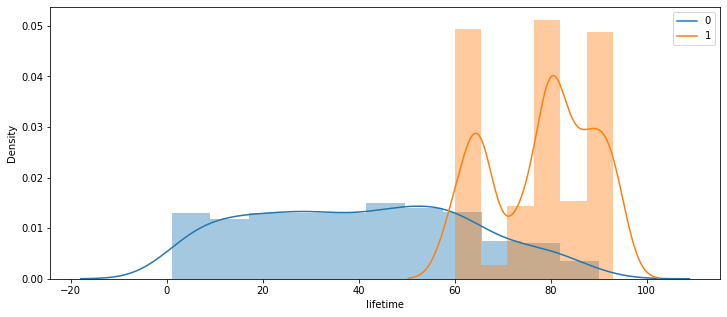

In [13]:
# lifetime vs broken
plt.figure(figsize=(12,5))
sns.distplot(df.lifetime[df.broken==0])
sns.distplot(df.lifetime[df.broken==1])
plt.legend(['0','1'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


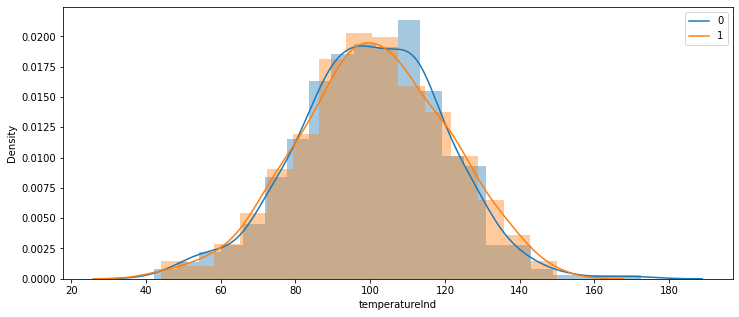

In [14]:
# lifetime vs broken
plt.figure(figsize=(12,5))
sns.distplot(df.temperatureInd[df.broken==0])
sns.distplot(df.temperatureInd[df.broken==1])
plt.legend(['0','1'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

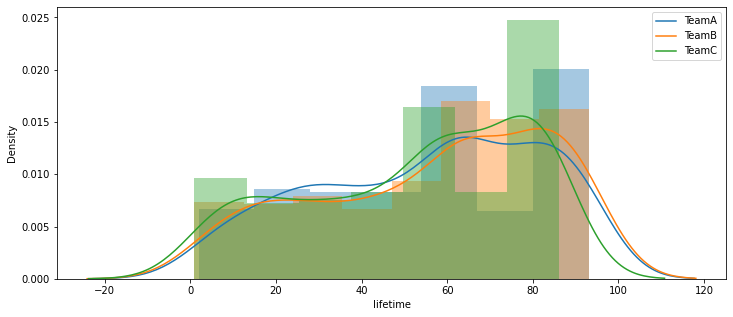

In [15]:
# lifetime vs team
plt.figure(figsize=(12,5))
sns.distplot(df.lifetime[df.team=='TeamA'])
sns.distplot(df.lifetime[df.team=='TeamB'])
sns.distplot(df.lifetime[df.team=='TeamC'])
plt.legend(['TeamA','TeamB','TeamC'])
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


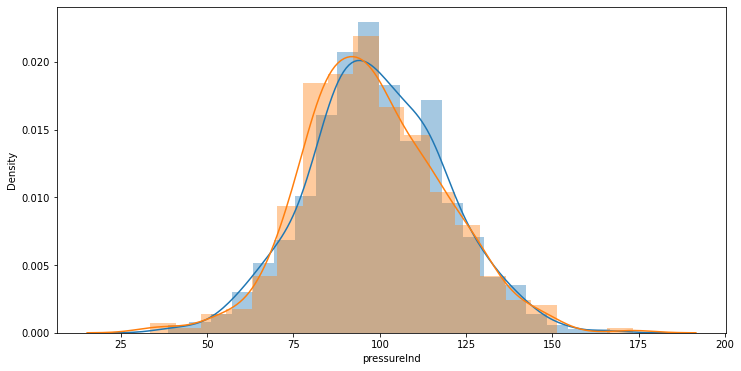

In [16]:
# pressureInd vs broken
plt.figure(figsize=(12,6))
sns.distplot(df.pressureInd[df.broken==0])
sns.distplot(df.pressureInd[df.broken==1])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


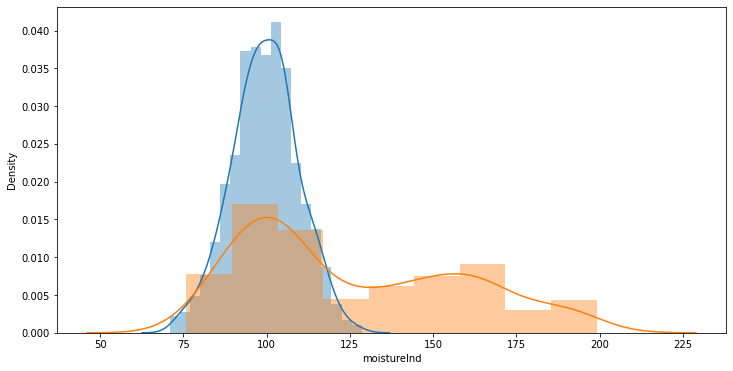

In [17]:
# moistureInd vs broken
plt.figure(figsize=(12,6))
sns.distplot(df.moistureInd[df.broken==0])
sns.distplot(df.moistureInd[df.broken==1])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


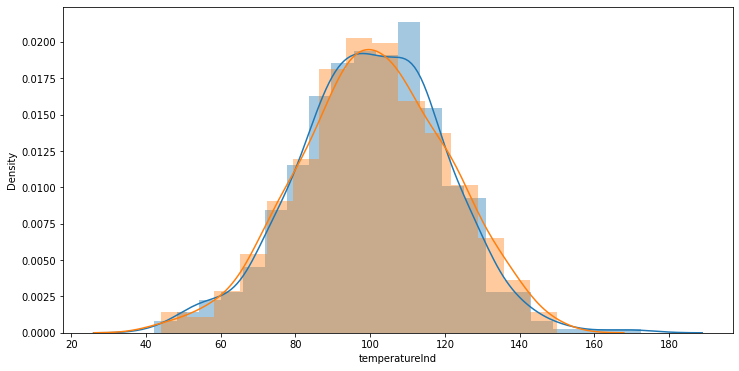

In [18]:
# temperatureInd vs broken
plt.figure(figsize=(12,6))
sns.distplot(df.temperatureInd[df.broken==0])
sns.distplot(df.temperatureInd[df.broken==1])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


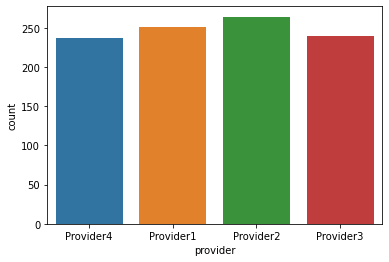

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


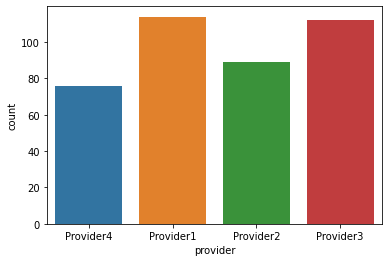

In [19]:
# provider vs broken
plt.figure(figsize=(6,4))
sns.countplot(df.provider,order=df.provider.unique())
plt.show()
sns.countplot(df.provider[df.broken==1],order=df.provider.unique())
plt.show()

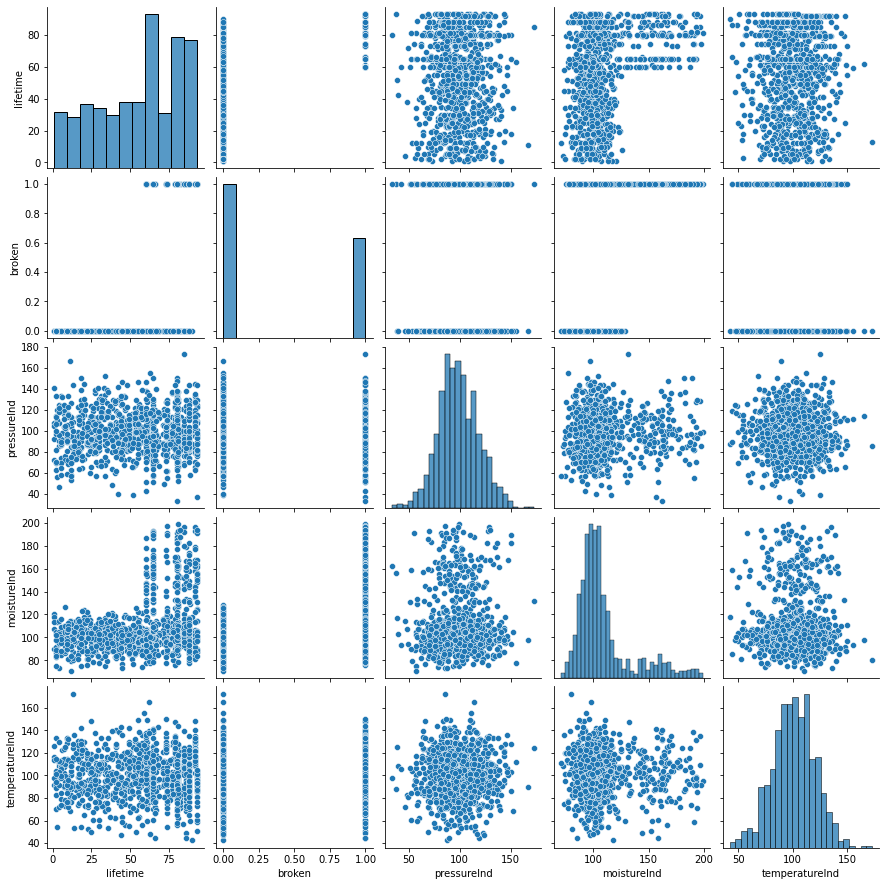

In [20]:
sns.pairplot(df)
plt.show()

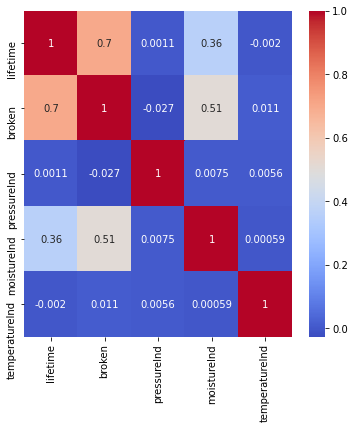

In [21]:
cor=df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

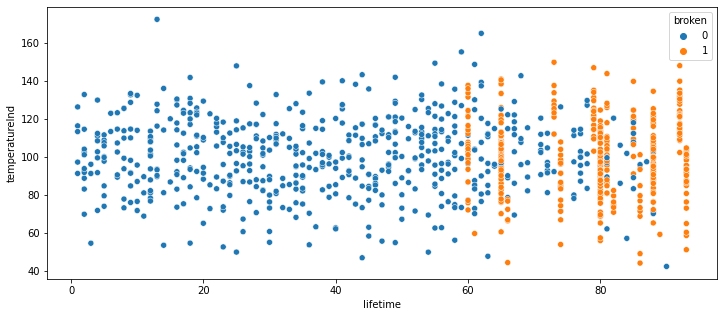

In [22]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='lifetime',y='temperatureInd',hue='broken',data=df)
plt.show()